In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# y = w * x + b 함수
def myfunc(x):
  w = 2.3 # 기울기
  b = 3.6 # y 절편.  점(0, 2.6)
  # x 절편은 점(-2, 0)이 됨.
  y = w * x + b
  noise = random.random() * 0.2 # Noise
  return y + noise

In [3]:
# random.random() -- 0.0 ~ 1.0
NUM_DATA = 20          # 데이터 갯수
XVALUE = 5              # X값의 범위 (0.0 ~ 5.0)
# type: python list
xtrain = [random.random() * XVALUE for i in range(NUM_DATA)]
xtrain.sort()            # sorting

In [6]:
ytrain = [myfunc(x) for x in xtrain]
print('xtrain :',xtrain[:3])
print('ytrain :',ytrain[:3])

xtrain : [0.03934402017340355, 0.23073381000664694, 0.3191599464288458]
ytrain : [3.8823997565672506, 4.237665613529607, 4.502078315349286]


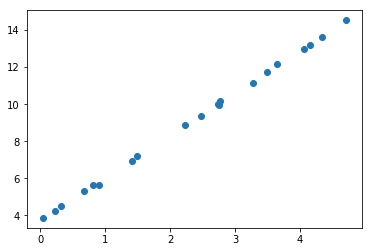

In [7]:
# actual data 산점도
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='actual')
plt.show()

In [8]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
print('xlist.shape :',xtrain.shape)  # shape ==  (10,)
print('ylist.shape :',ytrain.shape)  # shape ==  (10,)

xlist.shape : (20,)
ylist.shape : (20,)


In [10]:
# tensor 에 맞추기 위해 reshape
xtrain = xtrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
ytrain = ytrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
print('xlist.shape :', xtrain.shape)
print('ylist.shape :', ytrain.shape)

xlist.shape : (20, 1)
ylist.shape : (20, 1)


In [11]:
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([1,1], -1, 1), name='weight')
B = tf.Variable(tf.random_normal([1], -1, 1), name='bias')
Y2 = tf.matmul(X, W) + B   # [1,1]행렬 x [1,1]행렬 + [1]



In [12]:
# 손실 함수
# MSE = Mean Squared Error. 오차 제곱의 평균. (Y2-Y)**2의 평균
cost_function = tf.reduce_mean(tf.square(Y2 - Y))
# 옵티마이저
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
#optimizer = tf.train.AdamOptimizer(learning_rate=0.1)
training = optimizer.minimize(cost_function)

In [13]:
# loss list
history = []           # Record loss values for plot

In [15]:
# Session 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(500):
  res, cost  = sess.run([training, cost_function],
                        feed_dict={X: xtrain, Y:ytrain})
  if cost < 0.003:
    break

  if i % 1 == 0:
    y2, w, b = sess.run([Y2, W, B], feed_dict={X: xtrain, Y: ytrain})
    print('[%04d]' % i, 'LOSS', cost, 'W', w, 'bias', b)

    history.append(cost)

[0000] LOSS 112.37197 W [[5.663175]] bias [0.97100353]
[0001] LOSS 50.40735 W [[1.8479357]] bias [-0.04707241]
[0002] LOSS 23.426899 W [[4.2644176]] bias [0.91256255]
[0003] LOSS 11.594794 W [[2.587488]] bias [0.55660045]
[0004] LOSS 6.330553 W [[3.60706]] bias [1.0516073]
[0005] LOSS 3.921598 W [[2.8576195]] bias [0.9735091]
[0006] LOSS 2.7608151 W [[3.2756202]] bias [1.2595222]
[0007] LOSS 2.1518185 W [[2.9297385]] bias [1.2939614]
[0008] LOSS 1.7922266 W [[3.0898793]] bias [1.4823486]
[0009] LOSS 1.5501821 W [[2.9207203]] bias [1.5585924]
[0010] LOSS 1.3676836 W [[2.971418]] bias [1.6982468]
[0011] LOSS 1.2187698 W [[2.8806586]] bias [1.7863959]
[0012] LOSS 1.0914254 W [[2.8858922]] bias [1.8991184]
[0013] LOSS 0.97974414 W [[2.8308105]] bias [1.9868629]
[0014] LOSS 0.8805342 W [[2.8180618]] bias [2.0826714]
[0015] LOSS 0.79184216 W [[2.7800035]] bias [2.1652465]
[0016] LOSS 0.7123073 W [[2.7609885]] bias [2.2490036]
[0017] LOSS 0.6408766 W [[2.7317257]] bias [2.3248515]
[0018] LOSS

[0250] LOSS 0.0033612256 W [[2.2807684]] bias [3.7447586]
[0251] LOSS 0.0033612133 W [[2.2807686]] bias [3.744759]
[0252] LOSS 0.0033612147 W [[2.2807682]] bias [3.7447593]
[0253] LOSS 0.0033612177 W [[2.2807682]] bias [3.7447598]
[0254] LOSS 0.0033612265 W [[2.2807682]] bias [3.74476]
[0255] LOSS 0.00336124 W [[2.280768]] bias [3.7447603]
[0256] LOSS 0.0033612172 W [[2.280768]] bias [3.7447605]
[0257] LOSS 0.0033612177 W [[2.280768]] bias [3.7447608]
[0258] LOSS 0.003361211 W [[2.280768]] bias [3.744761]
[0259] LOSS 0.003361227 W [[2.2807677]] bias [3.7447612]
[0260] LOSS 0.0033612088 W [[2.2807677]] bias [3.7447615]
[0261] LOSS 0.0033612098 W [[2.2807674]] bias [3.7447617]
[0262] LOSS 0.003361214 W [[2.2807677]] bias [3.744762]
[0263] LOSS 0.003361208 W [[2.2807672]] bias [3.744762]
[0264] LOSS 0.0033612072 W [[2.2807674]] bias [3.7447622]
[0265] LOSS 0.0033612065 W [[2.2807672]] bias [3.7447624]
[0266] LOSS 0.0033612095 W [[2.2807674]] bias [3.7447627]
[0267] LOSS 0.003361214 W [[2.

[0433] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0434] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0435] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0436] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0437] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0438] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0439] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0440] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0441] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0442] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0443] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0444] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0445] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0446] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0447] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0448] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0449] LOSS 0.0033612163 W [[2.2807672]] bias [3.744763]
[0450] LOSS 0.0033612163 W [[2.

## loss 값의 변화 그래프

No handles with labels found to put in legend.


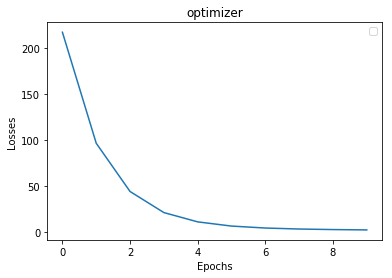

In [17]:
# Plot the accuracy and cost summaries
f, ax = plt.subplots()

ax.plot(history[:10])    # GradientDescentOptimizer
ax.set_title('optimizer')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

## 학습 데이터에 대한 정확도 확인 (학습 오차 확인)

In [19]:
[y_from_nn] = sess.run([Y2], feed_dict={X: xtrain})

for y_nn, y_real in zip(y_from_nn, ytrain):
    err = abs(y_nn[0] - y_real) / y_real * 100
    print('%.2f  %.2f 오차율 %.2f %%' % (y_nn[0], y_real, err))
    

3.83  3.88 오차율 1.23 %
4.27  4.24 오차율 0.79 %
4.47  4.50 오차율 0.65 %
5.28  5.30 오차율 0.29 %
5.61  5.62 오차율 0.23 %
5.79  5.67 오차율 2.21 %
6.98  6.94 오차율 0.50 %
7.15  7.21 오차율 0.88 %
8.83  8.87 오차율 0.48 %
9.38  9.36 오차율 0.21 %
9.99  10.01 오차율 0.22 %
10.02  9.93 오차율 0.92 %
10.05  10.15 오차율 0.99 %
11.20  11.12 오차율 0.73 %
11.71  11.73 오차율 0.11 %
12.04  12.14 오차율 0.80 %
13.00  12.96 오차율 0.31 %
13.21  13.17 오차율 0.30 %
13.65  13.64 오차율 0.09 %
14.48  14.51 오차율 0.23 %


## 테스트 데이터로 해보기

In [20]:
x_unseen = [random.random() * XVALUE for i in range(NUM_DATA)]
x_unseen = np.array(x_unseen).reshape((NUM_DATA, 1))

y_unseen = sess.run([Y2], feed_dict={X: x_unseen})

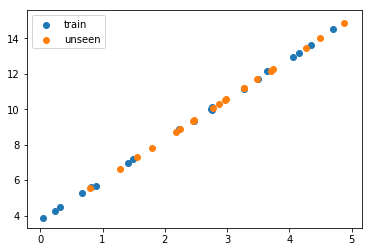

In [21]:
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='train')
ax.scatter(x_unseen, y_unseen, label='unseen')

ax.legend()
plt.show()